# Домашнее задание  
## Бакуева Дженнет 

Для начала работы нам необходимо импортировать библиотеки **pandas** и **numpy** для работы с данными.

In [1]:
import pandas as pd
import numpy as np

Далее выгружаем датасет для дальнейшей работы. Данные были взяты с сайта kaggle.com.  
## Описание данных:  
В данных представлен большой массив информации, предназначенный для анализа личности потребителя и определения характеристик "идеального" покупателя.  
Переменные внутри датасета можно разделить на 4 подгруппы: социодемографические показатели, описание продукта, описание маркетинговой компании, описание места. Всего в данных имеется 28 колон с переменными.  
### Люди:  
**ID** - уникальный идентификатор клиента  
**Year_Birth** - год рождения клиента  
**Education** - уровень образования клиента  
**Marital_Status** - семейное положение клиента  
**Income** - годовой доход семьи клиента  
**Kidhome** - rоличество детей в семье клиента  
**Teenhome** - количество подростков в семье клиента  
**Dt_Customer** - дата регистрации клиента в компании  
**Recency** - количество дней с момента последней покупки клиента  
**Complain** - бинарная переменная наличия жалоб, где переменная принимает *значение 1*, если клиент жаловался за последние 2 года, и *значение 0* в противном случае  
### Продукт:  
**MntWines** - сумма, потраченная на вино за последние 2 года  
**MntFruits** - сумма, потраченная на фрукты за последние 2 года  
**MntMeatProducts** - сумма, потраченная на мясо за последние 2 года  
**MntFishProducts** - сумма, потраченная на рыбу за последние 2 года  
**MntSweetProducts** - сумма, потраченная на сладости за последние 2 года  
**MntGoldProds** - сумма, потраченная на золото за последние 2 года  
### Продвижение:
**NumDealsPurchases** - количество покупок со скидкой  
**AcceptedCmp1** - бинарная переменная, где переменная принимает *значение 1*, если клиент принял предложение в 1-й кампании, и *значение 0* в противном случае  
**AcceptedCmp2** - бинарная переменная, где переменная принимает *значение 1*, если клиент принял предложение в 2-й кампании, и *значение 0* в противном случае  
**AcceptedCmp3** - бинарная переменная, где переменная принимает *значение 1*, если клиент принял предложение в 3-й кампании, и *значение 0* в противном случае  
**AcceptedCmp4** - бинарная переменная, где переменная принимает *значение 1*, если клиент принял предложение в 4-й кампании, и *значение 0* в противном случае  
**AcceptedCmp5** - бинарная переменная, где переменная принимает *значение 1*, если клиент принял предложение в 5-й кампании, и *значение 0* в противном случае  
**Responce** - бинарная переменная, где переменная принимает *значение 1*, если клиент принял предложение в последней кампании,и *значение 0* в противном случае  
### Место:  
**NumWebPurchases** - количество покупок, совершенных через веб-сайт компании  
**NumCatalogPurchases** - количество покупок, сделанных с использованием каталога  
**NumStorePurchases** - количество покупок, совершенных непосредственно в магазинах  
**NumWebVisitsMonth** - количество посещений веб-сайта компании за последний месяц  
## Цели:  
Хотелось бы отметить, что при выборе данных мною были выделены некоторые цели создания данного исследования, а именно определение зависимости количества покупок и размера потраченных денег от социодемографических показателей клиентов. В дальнейшем все манипуляции с данными будут исходить из цели исследования. Предполагается объединить стоимость всех покупок и количество всех покупок и использовать их в качестве зависимых переменных для исследования.

In [116]:
df = pd.read_excel('marketing_campaign2.xlsx')

In [117]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [118]:
df.shape

(2240, 29)

Мы имеем 2240 строк, то есть у нас есть 2240 наблюдей, по которым мы можем проводить дальнейший анализ. 

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Мы можем видеть, что в наших данных есть пропуски в значении Income. Позже мы будем с ними работать.  


Отсортируем наши данные по количеству потраченных денег на все категории товаров от меньшего к большему. Для удобства создадим общую перемнную с агрегированными расходами покупателей на все категории товаров. 

In [120]:
df['Sales'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] +  df['MntGoldProds']

In [121]:
df.sort_values(by = 'Sales')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Sales
1524,11110,1973,Graduation,Single,3502.0,1,0,13-04-2013,56,2,...,0,0,0,0,0,0,3,11,0,5
981,3955,1965,Graduation,Divorced,4861.0,0,0,22-06-2014,20,2,...,0,0,0,0,0,0,3,11,0,6
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,0,0,0,0,0,3,11,0,6
1420,5824,1972,PhD,Together,34578.0,2,1,11-04-2014,1,7,...,0,0,0,0,0,0,3,11,0,8
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,0,0,0,3,11,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,4475,1949,PhD,Married,69098.0,0,0,16-02-2013,82,1315,...,0,0,0,0,0,0,3,11,0,2440
987,4580,1969,Graduation,Married,75759.0,0,0,25-10-2013,46,1394,...,1,0,1,1,0,0,3,11,1,2486
1492,1763,1988,Graduation,Together,87679.0,0,0,27-07-2013,62,1259,...,1,0,1,1,0,0,3,11,1,2524
1572,5350,1991,Master,Single,90638.0,0,0,13-02-2014,29,1156,...,0,0,1,0,0,0,3,11,1,2525


Теперь для дальнейшего удобства удалим ненужные для дальнейшего исследования перемнные:

In [122]:
del df['MntWines']
del df['MntFruits'] 
del df['MntMeatProducts']
del df['MntFishProducts']
del df['MntSweetProducts']
del df['MntGoldProds']
del df['Dt_Customer'] 
del df['Z_Revenue']
del df['Z_CostContact']

In [123]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Sales
0,5524,1957,Graduation,Single,58138.0,0,0,58,3,8,...,4,7,0,0,0,0,0,0,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,38,2,1,...,2,5,0,0,0,0,0,0,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,26,1,8,...,10,4,0,0,0,0,0,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,26,2,2,...,4,6,0,0,0,0,0,0,0,53
4,5324,1981,PhD,Married,58293.0,1,0,94,5,5,...,6,5,0,0,0,0,0,0,0,422


Создадим переменную возраста *Age* для удобства: 

In [124]:
df['Age'] = 2022 - df['Year_Birth']

In [125]:
del df['Year_Birth']

In [126]:
df['Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth'] + df['NumDealsPurchases']

In [127]:
del df['NumWebPurchases']
del df['NumCatalogPurchases']
del df['NumStorePurchases']
del df['NumWebVisitsMonth']
del df['NumDealsPurchases'] 

In [128]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Sales,Age,Purchases
0,5524,Graduation,Single,58138.0,0,0,58,0,0,0,0,0,0,1,1617,65,32
1,2174,Graduation,Single,46344.0,1,1,38,0,0,0,0,0,0,0,27,68,11
2,4141,Graduation,Together,71613.0,0,0,26,0,0,0,0,0,0,0,776,57,25
3,6182,Graduation,Together,26646.0,1,0,26,0,0,0,0,0,0,0,53,38,14
4,5324,PhD,Married,58293.0,1,0,94,0,0,0,0,0,0,0,422,41,24


Отсортируем данные не только по сумме продаж, но и по их количеству:

In [131]:
df.sort_values(by = ['Purchases', 'Sales'])

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Sales,Age,Purchases
655,5555,Graduation,Divorced,153924.0,0,0,81,0,0,0,0,0,0,0,6,47,0
2132,11181,PhD,Married,156924.0,0,0,85,0,0,0,0,0,0,0,8,73,0
2228,8720,2n Cycle,Together,NaN,0,0,53,0,1,0,0,0,0,0,1679,44,1
617,1503,PhD,Together,162397.0,1,1,31,0,0,0,0,0,0,0,107,46,2
1300,5336,Master,Together,157733.0,1,0,37,0,0,0,0,0,0,0,59,51,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,7030,PhD,Married,66465.0,0,1,1,0,0,0,1,0,0,0,1485,67,41
627,4299,Graduation,Together,70971.0,0,1,28,0,0,0,0,0,0,1,1825,62,41
687,1501,PhD,Married,160803.0,0,0,21,0,0,0,0,0,0,0,1717,40,44
21,5376,Graduation,Married,2447.0,1,0,42,0,0,0,0,0,0,0,1730,43,44


В данных мы имеем две перемнные, которые определяют наличие детей и подростков в домохозяйстве. Так как для исследования важно само наличие детей и подростков в домохозяйстве, то я переделяю данные переменные *Kidhome* и *Teenhome* в бинарные, где 1 - в семье есть хотя бы 1 ребенок/подросток, и 0 в противном случае.  
Для этого воспользуемся анонимной функцией lambda

In [133]:
df['Kidhome'] = df['Kidhome'].apply(lambda x: 0 if x == 0 else 1)

In [134]:
df['Teenhome'] = df['Teenhome'].apply(lambda x: 0 if x == 0 else 1)

Для работы с переменными Education и Marital_Status необходимо перевести их в численное значение. Для этого создадим из них категориальные переменные с помощью функции pandas

In [136]:
df['Education'] = pd.Categorical(df['Education'])

In [146]:
df.groupby('Education').size()

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
dtype: int64

Соответсвие значений категориальной переменной образование (так как функция groupby выводит значения в порядке возрастания индекса)  
Education == 0 (2n Cycle)  
Education == 1 (Basic)  
Education == 2 (Graduation)  
Education == 3 (Master)  
Education == 4 (PhD)  

In [147]:
df['Marital_Status'] = pd.Categorical(df['Marital_Status'])

In [148]:
df.groupby('Marital_Status').size()

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
dtype: int64

Соответсвие значений категориальной переменной семейного положения (так как функция groupby выводит значения в порядке возрастания индекса)  
Marital_Status == 0 (Absurd)  
Marital_Status == 1 (Alone)  
Marital_Status == 2 (Divorced)  
Marital_Status == 3 (Married)  
Marital_Status == 4 (Single)  
Marital_Status == 5 (Together)  
Marital_Status == 6 (Widow)  
Marital_Status == 7 (YOLO)

Мы имеем 6 бинарных переменных, которые показывают, принял ли клиент предложение с 1 по 6 маркетинговые компании.  
Для исследования важна информация, принял ли клиент предложение или нет (мы не имеем подробной информации о проводимых маркетинговых кампаниях, поэтому нам важен лишь факт, подействовала ли промо акция на действия клиента или нет).  
Эта переменная будет показывать, можно ли воздействовать на потенциального клиента с помощью маркетинговых кампаний. Если это возможно, то можно назвать такого клиента более "идеальным" с точки зрения компании.  
Для того, чтобы создать описанную выше переменную, я сложу все переменные продвижения и далее с помощью ананимной функции создам новую бинарную переменную **Easy_promo**, принимающую значение 1, если клиент хотя бы раз принял предложение кампании, и 0 в противном случае.

In [ ]:
df['Easy_promo'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [422]:
def Easy_promo_bi(Easy_promo):
    if Easy_promo == 0:
        return Easy_promo_bi == 0
    else:
        return Easy_promo_bi == 1
df['Easy_promo'] = df['Easy_promo'].apply(Easy_promo_bi)

In [423]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,Sales,Age,Purchases,Easy_promo,log_Income,Purchases_Category
0,5524,Graduation,Single,58138.0,0,0,58,0,1617,65,32,False,10.970575,High
1,2174,Graduation,Single,46344.0,1,1,38,0,27,68,11,False,10.743847,Low
2,4141,Graduation,Together,71613.0,0,0,26,0,776,57,25,False,11.179032,Normal
3,6182,Graduation,Together,26646.0,1,0,26,0,53,38,14,False,10.190394,Low
4,5324,PhD,Married,58293.0,1,0,94,0,422,41,24,False,10.973237,Normal


In [154]:
del df['AcceptedCmp1']
del df['AcceptedCmp2']
del df['AcceptedCmp3']
del df['AcceptedCmp4']
del df['AcceptedCmp5']
del df['Response']

In [198]:
print(np.max(df['Purchases']))

46


In [200]:
def Purchases_category(Purchases):
    if Purchases <= 15:
        return 'Low'
    elif Purchases >= 30:
        return 'High'
    else:
        return 'Normal'

Описание значений категорий количества покупок:  
**Low** - реже, чем раз в 2 месяца  
**Norm** - приблизительно 1 раз в месяц  
**High** - чаще, чем 1 раз в месяц 

In [201]:
df['Purchases'].apply(Purchases_category)

0         High
1          Low
2       Normal
3          Low
4       Normal
         ...  
2235    Normal
2236    Normal
2237    Normal
2238    Normal
2239    Normal
Name: Purchases, Length: 2240, dtype: object

In [202]:
df['Purchases_Category'] = df['Purchases'].apply(Purchases_category)

In [203]:
df['Purchases_Category'] = pd.Categorical(df['Purchases_Category'])

Последним преобразованием в датасете будет добавление переменной логарифма доходов покупателей, чтобы при анализе использовать нормализованные значения, а не абсолютные. Для этого воспользуемся функцией log библиотеки numpy. Будет использоваться натуральный логарифм.

In [157]:
df['log_Income'] = np.log(df['Income'])

<AxesSubplot:>

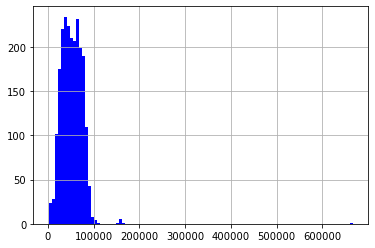

In [379]:
df['Income'].hist(bins=100, color='blue')

<AxesSubplot:>

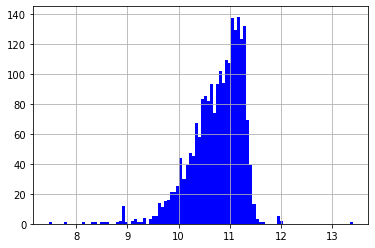

In [378]:
df['log_Income'].hist(bins=100, color='blue')

На гистограммах можно заметить, что распределение переменной логарифма доходов больше подходит для Гауссовского распределения. При построении логарифмических и полулогарифмических регрессий коэффициенты будут показывать влиение не в абсолютном значении, а в процентном, что более показательно. 

In [188]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,Sales,Age,Purchases,Easy_promo,log_Income,Purchases_Category
0,5524,Graduation,Single,58138.0,0,0,58,0,1617,65,32,1,10.970575,Normal
1,2174,Graduation,Single,46344.0,1,1,38,0,27,68,11,0,10.743847,Low
2,4141,Graduation,Together,71613.0,0,0,26,0,776,57,25,0,11.179032,Normal
3,6182,Graduation,Together,26646.0,1,0,26,0,53,38,14,0,10.190394,Low
4,5324,PhD,Married,58293.0,1,0,94,0,422,41,24,0,10.973237,Normal


Для наглядности посмотрим на простую визуализацию распределения частот значений описательных переменных.

1. Распределение переменной Образования 

<AxesSubplot:>

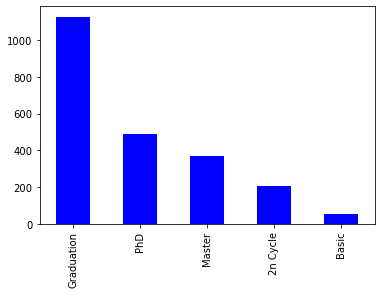

In [377]:
df['Education'].value_counts().plot(kind='bar', color='blue')

In [446]:
df['Education'].describe()

count           2240
unique             5
top       Graduation
freq            1127
Name: Education, dtype: object

2. Распределение переменной Семейного положения 

<AxesSubplot:>

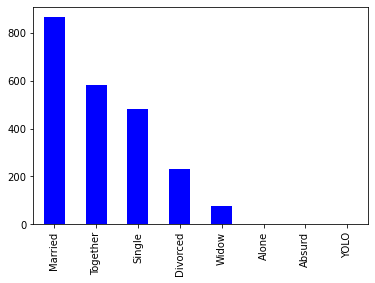

In [376]:
df['Marital_Status'].value_counts().plot(kind='bar', color='blue')

In [447]:
df['Marital_Status'].describe()

count        2240
unique          8
top       Married
freq          864
Name: Marital_Status, dtype: object

3.1. Распределение переменной Продаж 

<AxesSubplot:>

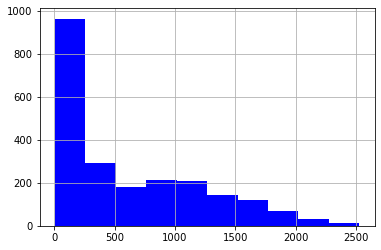

In [374]:
df['Sales'].hist(color='blue')

In [449]:
df['Sales'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Sales, dtype: float64

3.2. Распределение переменной Логарифма Продаж 

<AxesSubplot:>

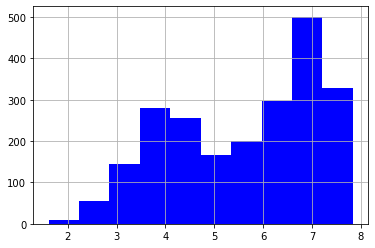

In [375]:
np.log(df['Sales']).hist(color='blue')

## Дескриптивная статистика:

In [215]:
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,Complain,Sales,Age,Purchases,Easy_promo,log_Income
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2216.000000
mean,5592.159821,52247.251354,0.422768,0.483036,49.109375,0.009375,605.798214,53.194196,20.178571,0.446875,10.753799
std,3246.662198,25173.076661,0.494109,0.499824,28.962453,0.096391,602.249288,11.984069,7.293275,0.890543,0.505863
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,5.000000,26.000000,0.000000,0.000000,7.455877
25%,2828.250000,35303.000000,0.000000,0.000000,24.000000,0.000000,68.750000,45.000000,14.000000,0.000000,10.471723
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,0.000000,396.000000,52.000000,19.000000,0.000000,10.847033
75%,8427.750000,68522.000000,1.000000,1.000000,74.000000,0.000000,1045.500000,63.000000,25.000000,1.000000,11.134910
max,11191.000000,666666.000000,1.000000,1.000000,99.000000,1.000000,2525.000000,129.000000,46.000000,5.000000,13.410044


Ранее мы выяснили, что в нашем датасете имеются пропущенные значения в переменной **Income** и переменной **log_Income** соответсвенно. Посмотрим, сколько у нас пропущенных значений:

In [224]:
df.isna().sum()

ID                     0
Education              0
Marital_Status         0
Income                24
Kidhome                0
Teenhome               0
Recency                0
Complain               0
Sales                  0
Age                    0
Purchases              0
Easy_promo             0
log_Income            24
Purchases_Category     0
dtype: int64

Пропущенных значений всего 24 по обеим переменным. Теперь удалим наши пропущенные значения

Чтобы не удалять значения из исходного датафрейма, создадим новый датафрейм **df_clean**

In [424]:
df_clean = df.dropna(subset=['Income'])

In [263]:
df_clean.shape

(2216, 17)

Теперь мы имеем очищенный от пропущенных переменных датафрейм df_clean

# Выбросы:  
Определим, есть ли в наших переменных выбросы. Мы имеем 2 переменные, в которых могут быть выбросы - **Income** и **Sales**. Для определения этих выбросов я импортирую дополнительную библиотеку **scipi.stats**, создам колонки с z-оценками по двум переменным и выведу те значения z-оценок, которые отличаются на 3 среднеквадратичных откланения. 

In [230]:
import scipy.stats

1. Переменная Дохода

In [233]:
df_clean['z-score_inc']=scipy.stats.zscore(df_clean['Income'])

/var/folders/04/51fpcw152gj8lxptgk2gghg40000gp/T/ipykernel_1667/3079110550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['z-score_inc']=scipy.stats.zscore(df_clean['Income'])


In [237]:
df_clean.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,Sales,Age,Purchases,Easy_promo,log_Income,Purchases_Category,z-score_inc
0,5524,Graduation,Single,58138.0,0,0,58,0,1617,65,32,1,10.970575,High,0.234063
1,2174,Graduation,Single,46344.0,1,1,38,0,27,68,11,0,10.743847,Low,-0.234559
2,4141,Graduation,Together,71613.0,0,0,26,0,776,57,25,0,11.179032,Normal,0.769478
3,6182,Graduation,Together,26646.0,1,0,26,0,53,38,14,0,10.190394,Low,-1.017239
4,5324,PhD,Married,58293.0,1,0,94,0,422,41,24,0,10.973237,Normal,0.240221


2. Переменная Продаж

In [238]:
df_clean['z-score_sales']=scipy.stats.zscore(df_clean['Sales'])
df_clean.head()

/var/folders/04/51fpcw152gj8lxptgk2gghg40000gp/T/ipykernel_1667/1574455964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['z-score_sales']=scipy.stats.zscore(df_clean['Sales'])


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,Sales,Age,Purchases,Easy_promo,log_Income,Purchases_Category,z-score_inc,z-score_sales
0,5524,Graduation,Single,58138.0,0,0,58,0,1617,65,32,1,10.970575,High,0.234063,1.675488
1,2174,Graduation,Single,46344.0,1,1,38,0,27,68,11,0,10.743847,Low,-0.234559,-0.962358
2,4141,Graduation,Together,71613.0,0,0,26,0,776,57,25,0,11.179032,Normal,0.769478,0.280250
3,6182,Graduation,Together,26646.0,1,0,26,0,53,38,14,0,10.190394,Low,-1.017239,-0.919224
4,5324,PhD,Married,58293.0,1,0,94,0,422,41,24,0,10.973237,Normal,0.240221,-0.307044


In [265]:
df_clean[df_clean['z-score_sales'] < -3]
df_clean[df_clean['z-score_inc'] < -3]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,Sales,Age,Purchases,Easy_promo,log_Income,Purchases_Category,z-score_inc,z-score_sales


Можно видеть, что у нас нет выбросов по нижней границе, поэтому рассмотрим верхниии границы

In [258]:
df_clean['z-score_sales'][df_clean['z-score_sales'] > 3].info()

<class 'pandas.core.series.Series'>
Int64Index: 5 entries, 987 to 1572
Series name: z-score_sales
Non-Null Count  Dtype  
--------------  -----  
5 non-null      float64
dtypes: float64(1)
memory usage: 80.0 bytes


По нижней границе мы имеем 5 выбросов для переменной Sales

In [259]:
df_clean['z-score_inc'][df_clean['z-score_inc'] > 3].info()

<class 'pandas.core.series.Series'>
Int64Index: 8 entries, 164 to 2233
Series name: z-score_inc
Non-Null Count  Dtype  
--------------  -----  
8 non-null      float64
dtypes: float64(1)
memory usage: 128.0 bytes


По нижней границе мы имеем 8 выбросов для переменной Income

Далее воспользуемся функцией вывода среднеквадратичного отклонения. 

In [266]:
mean = df_clean['Income'].mean()
std_inc = df_clean['Income'].std()
std_inc_bottom = mean - 3 * std_inc
std_inc_top = mean + 3 * std_inc
print(std_inc_bottom, std_inc_top)

-23271.978628913617 127766.48133649485


В нижней границе нет отклонений, так как Дохода ниже нуля в данных не имеется. 

In [267]:
df_clean[df_clean['Income'] > std_inc_top].shape

(8, 16)

Получаем те же 8 отклонений, что и ранее получили с помощью z-оценки. Повторим то же самое со среднеквадратичным отклонением переменнгой Sales 

In [268]:
mean = df_clean['Sales'].mean()
std_sales = df_clean['Sales'].std()
std_sales_bottom = mean - 3 * std_sales
std_sales_top = mean + 3 * std_sales
print(std_sales_bottom, std_sales_top)

-1201.626068046177 2415.7767900678377


В нижней границе нет отклонений, так как Продаж ниже нуля в данных не имеется. 

In [269]:
df_clean[df_clean['Sales'] > std_sales_top].shape

(5, 16)

Получаем те же 5 отклонений, что и ранее получили с помощью z-оценки.

Проверим влияние этих выбросов на меры центрального значения. Для этого создадим датафреймы без выбросов и определим их медианное и среднее значения:

In [274]:
df_clean_outliers_s = df_clean[df_clean['Sales'] <= std_sales_top]

In [275]:
df_clean_outliers_i = df_clean[df_clean['Income'] <= std_inc_top]

In [280]:
print('Mean income with outliers =', df_clean['Income'].mean())
print('Mean income without outliers =', df_clean_outliers_i['Income'].mean())
print('Mean sales with outliers =', df_clean['Sales'].mean())
print('Mean sales without outliers =', df_clean_outliers_s['Sales'].mean())

Mean income with outliers = 52247.25135379061
Mean income without outliers = 51633.63813405797
Mean sales with outliers = 607.0753610108303
Mean sales without outliers = 602.7946630483943


In [282]:
print('Median income with outliers =', df_clean['Income'].median())
print('Median income without outliers =', df_clean_outliers_i['Income'].median())
print('Median sales with outliers =', df_clean['Sales'].median())
print('Median sales without outliers =', df_clean_outliers_s['Sales'].median())

Median income with outliers = 51381.5
Median income without outliers = 51301.0
Median sales with outliers = 396.5
Median sales without outliers = 396.0


Так как выбросы не имеют критического влияния на меры центрального значения, то продолжим работать с датафреймом **df_clean** с выбросами.

In [321]:
df_clean['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Добавим дополнительную категориальную переменную уровня дохода, где уровень дохода делится на высокий  
"High income" (выше 40 000),  
"Middle income" (больше или равно 15 000 и меньше 40 000) и  
"Low incime" (меньше 15 000) 

In [346]:
def Income_cat(Income):
    if Income < 15000:
        return 'Low income'
    if Income >= 15000 and Income < 40000:
        return 'Middle income'
    if Income >= 40000:
        return 'High income'
    else:
        return Income


In [347]:
df_clean['Income_cat'] = df_clean['Income'].apply(Income_cat)

/var/folders/04/51fpcw152gj8lxptgk2gghg40000gp/T/ipykernel_1667/1856300328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Income_cat'] = df_clean['Income'].apply(Income_cat)


In [348]:
df_clean.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,Sales,Age,Purchases,Easy_promo,log_Income,Purchases_Category,z-score_inc,z-score_sales,Income_cat
0,5524,Graduation,Single,58138.0,0,0,58,0,1617,65,32,1,10.970575,High,0.234063,1.675488,High income
1,2174,Graduation,Single,46344.0,1,1,38,0,27,68,11,0,10.743847,Low,-0.234559,-0.962358,High income
2,4141,Graduation,Together,71613.0,0,0,26,0,776,57,25,0,11.179032,Normal,0.769478,0.280250,High income
3,6182,Graduation,Together,26646.0,1,0,26,0,53,38,14,0,10.190394,Low,-1.017239,-0.919224,Middle income
4,5324,PhD,Married,58293.0,1,0,94,0,422,41,24,0,10.973237,Normal,0.240221,-0.307044,High income


# Корреляция:

В нашем датафрейме имеется небольшое количество количественных переменных: **Income, log_Income, Age, Sales, Puschases** (потому что изначальная логика исследования строилась на построении регрессионных моделей). Так как все остальные переменные являются либо категорииальными, либо бинарными, то строить корреляцию можно только по 5 количественным переменным, перечисленным выше.

**Построим зависимость Продаж от Доходов:**

In [453]:
df_clean['Sales'].corr(df_clean['Income'])

0.6675760903888281

<AxesSubplot:xlabel='Income', ylabel='Sales'>

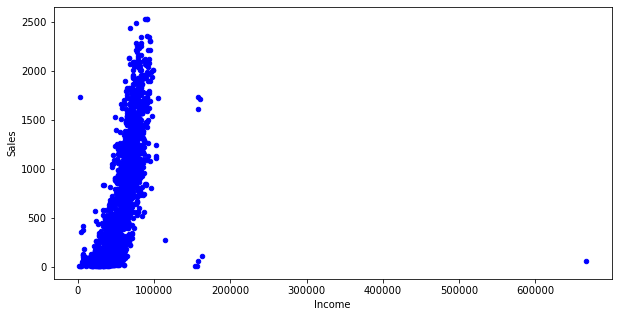

In [455]:
df_clean.plot('Income', 'Sales', kind='scatter', color='blue', figsize = (10,5))

Корреляция между данными переменными 66%. Так же на графике рассеивания можно увидеть четкую "линию" зависимости Продаж от Дохода

**Аналогично проведем корреляцию Продаж и логарифма Доходов**

In [451]:
df_clean['Sales'].corr(df_clean['log_Income'])

0.6965131210855754

<AxesSubplot:xlabel='log_Income', ylabel='Sales'>

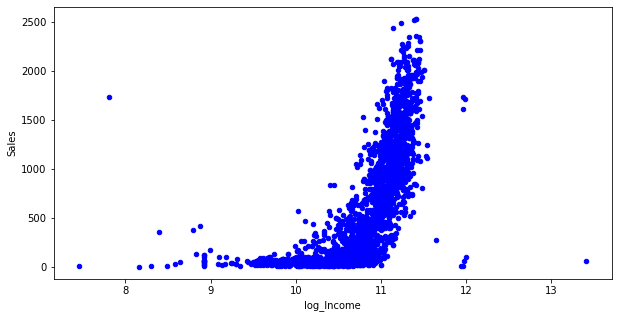

In [456]:
df_clean.plot('log_Income', 'Sales', kind='scatter', color='blue', figsize = (10,5))

Здесь так же прослеживается зависимость - чем больше Доход, тем выше Продажи в абсолютном значении

**Построим зависимость Продаж и Возраста покупателя**

In [291]:
df_clean['Sales'].corr(df_clean['Age'])

0.11348683837578546

Низкий уровень корреляции 11%

<AxesSubplot:xlabel='Sales', ylabel='Age'>

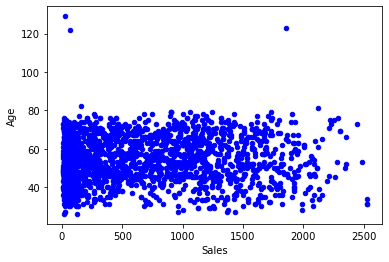

In [371]:
df_clean.plot('Sales', 'Age', kind='scatter',color='blue')

На графике есть едва заметная зависимость: чем больше возраст, тем меньше Продажи

**Построим зависимость Количества Продаж от дохода**

In [285]:
df_clean['Purchases'].corr(df_clean['Income'])

0.4128709740981714

Корреляция 42%, что можно назвать умеренным.

<AxesSubplot:xlabel='Purchases', ylabel='Income'>

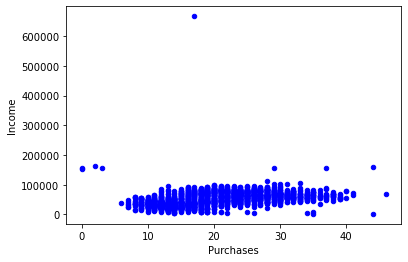

In [372]:
df_clean.plot('Purchases', 'Income', kind='scatter', color='blue')

**Построим зависимость Количества Продаж от Возраста**

In [292]:
df_clean['Purchases'].corr(df_clean['Age'])

0.1378477122187308

Аналогично Sales Количество продаж практически не зависит от Вощраста клиента

<AxesSubplot:xlabel='Purchases', ylabel='Age'>

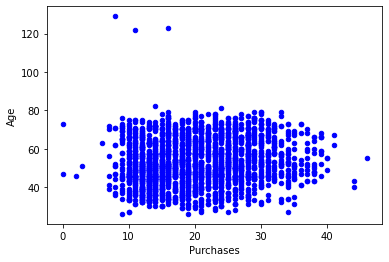

In [373]:
df_clean.plot('Purchases', 'Age', kind='scatter', color='blue')

На гистограмме рассеивания так же не заметна зависимость

# Визуализация:  
Для оформления визуализации воспользуемся дополнительной биьлиотекой **matplotlib.pyplot**

In [298]:
import matplotlib.pyplot as plt

**Построим bar chart с Уровнем образования и категориальной перемнной Количества Продаж**

<AxesSubplot:xlabel='Education'>

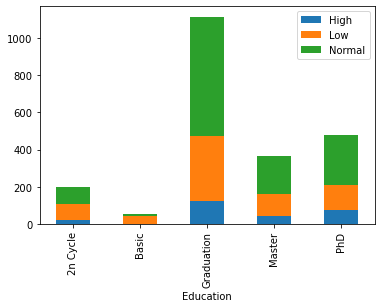

In [442]:
df_clean.groupby('Education')['Purchases_Category'].value_counts().unstack().plot(kind='bar', stacked = True)

Можно заметить, что люди с высшим образованием дулают покупки сильно чаще, чем люди с базовым образованием

**Аналогично построим график Семейного положения и категориальной перемнной Количества Продаж**

<AxesSubplot:xlabel='Marital_Status'>

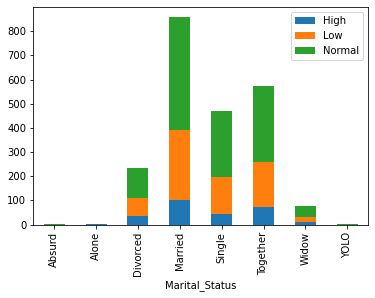

In [443]:
df_clean.groupby('Marital_Status')['Purchases_Category'].value_counts().unstack().plot(kind='bar', stacked = True)

По этой гистограмме заметно, что люди в отношениях склонны к высокой частоте покупок, чем одинокие.

**Построим график Наличия детей и категориальной перемнной Количества Продаж**

<AxesSubplot:xlabel='Kidhome'>

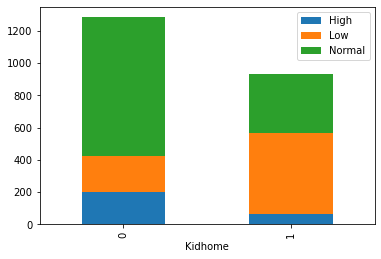

In [444]:
df_clean.groupby('Kidhome')['Purchases_Category'].value_counts().unstack().plot(kind='bar', stacked = True)

Изначально была гипотеза, что люди с детьми чаще производят покупки, чем без детей, однако из этого графика можно заметить, что клиенты без детей производят покупки чаще

**Построим график Наличия подростков и категориальной перемнной Количества Продаж**

<AxesSubplot:xlabel='Teenhome'>

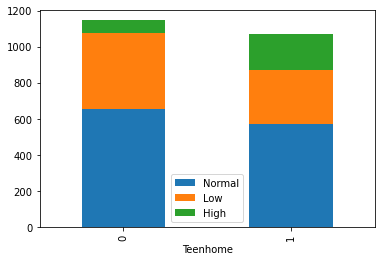

In [445]:
df_clean.groupby('Teenhome')['Purchases_Category'].value_counts().unstack().plot(kind='bar', stacked = True)

**Построим графики зависимости Продаж от Образования, Семейного положения и Уровня дохода. Для наглядности приведем аналогичные графики с частотой произведения покупок (Purchases).**

In [325]:
df_ed_sales = df_clean.groupby('Education')['Sales'].mean()

In [352]:
df_ed_purchases = df_clean.groupby('Education')['Purchases'].mean()

In [356]:
df_inc_sales = df_clean.groupby('Income_cat')['Sales'].mean()
df_inc_purchases = df_clean.groupby('Income_cat')['Purchases'].mean()

In [362]:
df_fam_sales = df_clean.groupby('Marital_Status')['Sales'].mean()
df_fam_purchases = df_clean.groupby('Marital_Status')['Purchases'].mean()

<BarContainer object of 8 artists>

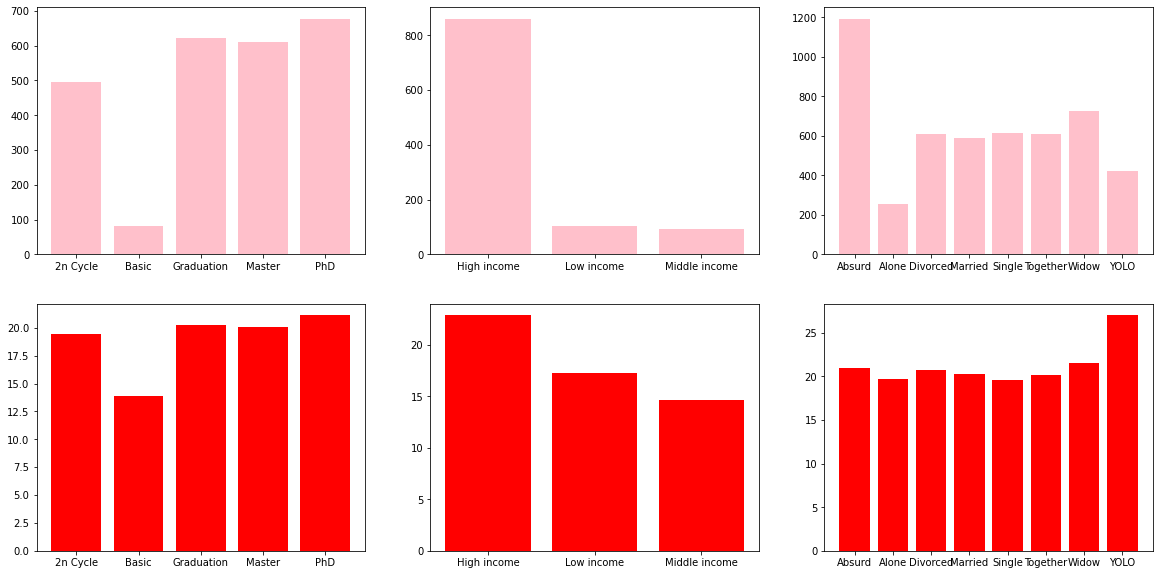

In [458]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[1][0].bar(df_ed_purchases.index, df_ed_purchases, color='red')
ax[0][0].bar(df_ed_sales.index, df_ed_sales, color='pink')
ax[0][1].bar(df_inc_sales.index, df_inc_sales, color='pink')
ax[0][2].bar(df_fam_sales.index, df_fam_sales, color='pink')
ax[1][1].bar(df_inc_purchases.index, df_inc_purchases, color='red')
ax[1][2].bar(df_fam_purchases.index, df_fam_purchases, color='red')

**Построим зависимость Продаж и частоты покупок от Количества дней с последней покупки:**

In [380]:
df_last_sales = df_clean.groupby('Recency')['Sales'].mean()
df_last_purchases = df_clean.groupby('Recency')['Purchases'].mean()

<BarContainer object of 100 artists>

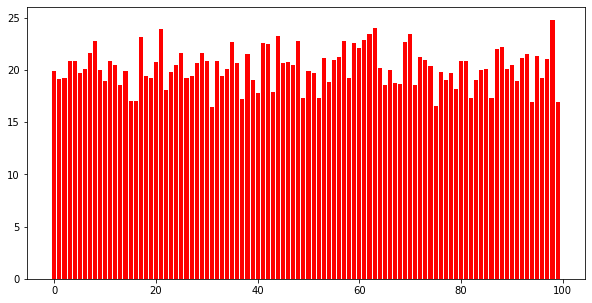

In [404]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df_last_purchases.index, df_last_purchases, color='red')

<BarContainer object of 100 artists>

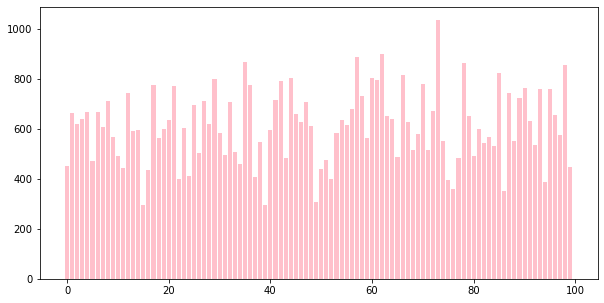

In [402]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df_last_sales.index, df_last_sales, color='pink')

# Введение в регрессионный анализ:  
Далее я приведу примеры регрессионных моделей, которые прпедполагались при обработке исходных данных.

Для начала импортируем необходимые библиотеки

In [428]:
import seaborn as sns
import statsmodels.api as sm

Проверим наши переменные на мультиколлениарность (взаимозависимость описывающих переменных), чтобы убедиться, что наша модель будет эффективной.

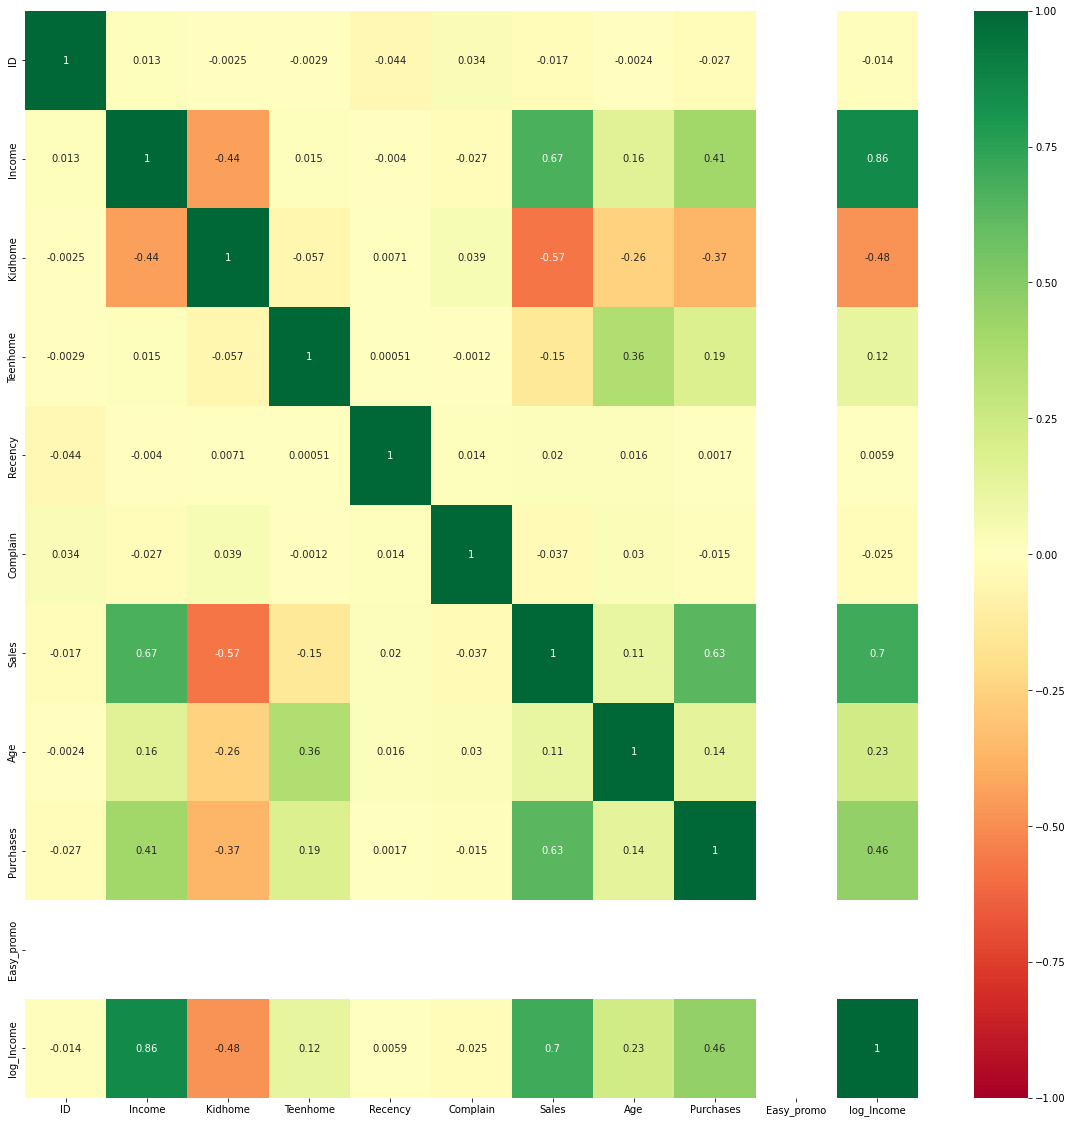

In [430]:
plt.figure(figsize =(20,20))
p=sns.heatmap(df_clean.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1 )

Можем видеть умеренную корреляцию между переменными

In [432]:
X = df_clean['Sales']
y = df_clean['Age']

res = scipy.stats.linregress(X, y)
print (res)

LinregressResult(slope=0.0022560981356656907, intercept=51.80998129790153, rvalue=0.11348683837578545, pvalue=8.479092916657699e-08, stderr=0.0004197675079430761, intercept_stderr=0.35910747183123604)


p_value показывает, что модель статистически значима, однако уже видно, что значение r_sq будет низким, то есть модель плохо объясняет дисперсию целеваой переменной

In [434]:
r_sq = res.rvalue ** 2
r_sq

0.01287926248453165

In [436]:
X_1 = df_clean['Sales']
y = df_clean['Age']
X_1_cons = sm.add_constant(X_1)

model = sm.OLS(y, X_1_cons)
res_1 = model.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     28.89
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           8.48e-08
Time:                        17:12:34   Log-Likelihood:                -8633.4
No. Observations:                2216   AIC:                         1.727e+04
Df Residuals:                    2214   BIC:                         1.728e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8100      0.359    144.274      0.0

В данном домашнем задании не требуется приводить регрессии, однако, несмотря на это многие манипуляции с исходными данными были рассчитаны на дальнейшее использование в регрессиях:  
1. Использование зависимые переменные Sales и Purchases для определения реливантных описательных факторов (возраст, логарифм дохода, семейное положение, уровень образования). 
2. Помимо этого предполагалось построить модель бинарного выбора с зависимой переменной Easy_promo для определения тех характеристик клиента, которые влияют на восприятие клиентами промоакций и маркетинговыз кампаний. 